# Gene-Artist correlations
### - Gene - Gene correlation, via cosine similarity
### - Artist - Artist correlation, via cosine similarity

** small sample was created for these correlations: randomly selected 100 female artists with genes and similar artists defined

In [1]:
import pandas as pd
import sklearn as skl
from sklearn import *

In [2]:
data = pd.read_csv('artists_2.csv')

In [3]:
data

,id,sortable_name,birthyear,deathyear,age,gender,nationality,hometown,location,similar_artists,similar_artists_names,genes,gene_types,artwork_link,artwork_names,published_artworks,pub_artworks_info
0,57c80d15a09a6753d4000a13,0331с and Grisha,Blank,Blank,0,Male,Russian,"Khimki, Moscow Oblast, Russia","Moscow, Russia",https://api.artsy.net/api/artists?similar_to_a...,[],https://api.artsy.net/api/genes?artist_id=57c8...,NaN,https://api.artsy.net/api/artworks?artist_id=5...,[],https://api.artsy.net/api/artworks?artist_id=5...,tbd
1,52c721e5b202a3edf1000072,03B Muren,Blank,Blank,0,Blank,Not specified,Blank,Blank,https://api.artsy.net/api/artists?similar_to_a...,Sim artists json loc not readable,https://api.artsy.net/api/genes?artist_id=52c7...,NaN,https://api.artsy.net/api/artworks?artist_id=5...,[],https://api.artsy.net/api/artworks?artist_id=5...,tbd
2,5cdae4d455d8c8318b939791,06D Atelier,Blank,Blank,0,Blank,Italian,Blank,"London, UK",https://api.artsy.net/api/artists?similar_to_a...,[],https://api.artsy.net/api/genes?artist_id=5cda...,NaN,https://api.artsy.net/api/artworks?artist_id=5...,[],https://api.artsy.net/api/artworks?artist_id=5...,tbd
3,5d6f9f7e3a583e000e51956d,1+1+1,Blank,Blank,0,Blank,Finnish;Swedish;Icelandic,Blank,"Reykjavík, Iceland",https://api.artsy.net/api/artists?similar_to_a...,[],https://api.artsy.net/api/genes?artist_id=5d6f...,NaN,https://api.artsy.net/api/artworks?artist_id=5...,[],https://api.artsy.net/api/artworks?artist_id=5...,tbd
4,5568f47672616954f4980000,1010,1979,Blank,0,Male,Not specified,Poland,Blank,https://api.artsy.net/api/artists?similar_to_a...,Sim artists json loc not readable,https://api.artsy.net/api/genes?artist_id=5568...,1970–present;21st Century;Abstract Art;Abstrac...,https://api.artsy.net/api/artworks?artist_id=5...,[],https://api.artsy.net/api/artworks?artist_id=5...,tbd
5,55e1b6717261693b9e000784,108,1978,Blank,0,Male,Italian,"Alessandria, Italy",Blank,https://api.artsy.net/api/artists?similar_to_a...,Sim artists json loc not readable,https://api.artsy.net/api/genes?artist_id=55e1...,1970–present;21st Century;Abstract Art;Abstrac...,https://api.artsy.net/api/artworks?artist_id=5...,[],https://api.artsy.net/api/artworks?artist_id=5...,tbd
6,5cc9c1f473cb733537605ca5,11 pittori italiani d'oggi,Blank,Blank,0,Blank,Not specified,Blank,Blank,https://api.artsy.net/api/artists?similar_to_a...,Sim artists json loc not readable,https://api.artsy.net/api/genes?artist_id=5cc9...,NaN,https://api.artsy.net/api/artworks?artist_id=5...,[],https://api.artsy.net/api/artworks?artist_id=5...,tbd
7,5cb8e61ccd72140012713a11,1100 Architect (David Piscuskus and Juergen Ri...,Blank,Blank,0,Blank,Not specified,Blank,Blank,https://api.artsy.net/api/artists?similar_to_a...,Sim artists json loc not readable,https://api.artsy.net/api/genes?artist_id=5cb8...,NaN,https://api.artsy.net/api/artworks?artist_id=5...,[],https://api.artsy.net/api/artworks?artist_id=5...,tbd
8,5cc9c2c62999cb75f7a34624,13 Pittori a Roma,Blank,Blank,0,Blank,Not specified,Blank,Blank,https://api.artsy.net/api/artists?similar_to_a...,[],https://api.artsy.net/api/genes?artist_id=5cc9...,Artists gene json loc not readable,https://api.artsy.net/api/artworks?artist_id=5...,None,https://api.artsy.net/api/artworks?artist_id=5...,tbd
9,56421d54258faf667f0001be,14 June,Blank,Blank,0,Blank,Not specified,Blank,Blank,https://api.artsy.net/api/artists?similar_to_a...,[],https://api.artsy.net/api/genes?artist_id=5642...,Artists gene json loc not readable,https://api.artsy.net/api/artworks?artist_id=5...,None,https://api.artsy.net/api/artworks?artist_id=5...,tbd


In [4]:
#cleaning df
data = data[data['similar_artists_names'] != 'Sim artists json loc not readable']

In [5]:
data = data[data['similar_artists_names'] != '[]']

In [6]:
data = data[data['similar_artists_names'] != 'Sim artits json loc not readable']

In [7]:
data = data[data['gene_types'] != 'Artists gene json loc not readable']

In [8]:
data = data[data['gender'] == 'Female']

In [9]:
data

,id,sortable_name,birthyear,deathyear,age,gender,nationality,hometown,location,similar_artists,similar_artists_names,genes,gene_types,artwork_link,artwork_names,published_artworks,pub_artworks_info
275,5a6bb59d8b3b8165e4d4d173,Abbate Loren,1979,Blank,0,Female,American,"New Jersey, United States","Jersey City, NJ, United States",https://api.artsy.net/api/artists?similar_to_a...,"['5352c141139b2154a900007c', '57f68fdda09a6738...",https://api.artsy.net/api/genes?artist_id=5a6b...,1970–present;21st Century;Abstract versus Figu...,https://api.artsy.net/api/artworks?artist_id=5...,[],https://api.artsy.net/api/artworks?artist_id=5...,tbd
309,554a788f726169251a210800,Abboud Jumana Emil,1971,Blank,0,Female,Palestinian,Palestine,"Jerusalem, Israel",https://api.artsy.net/api/artists?similar_to_a...,"['563e04cf139b2121440000da', '518d59577a6d645b...",https://api.artsy.net/api/genes?artist_id=554a...,1970–present;21st Century;Canada;Collective Hi...,https://api.artsy.net/api/artworks?artist_id=5...,None,https://api.artsy.net/api/artworks?artist_id=5...,tbd
433,518ceb0d7a6e3863980000b9,Abeles Michele,1977,Blank,0,Female,American,Blank,"New York, New York",https://api.artsy.net/api/artists?similar_to_a...,"['50a68ea57ff077605f000f83', '4e9380284a6e5400...",https://api.artsy.net/api/genes?artist_id=518c...,1970–present;21st Century;Digital Culture;Enga...,https://api.artsy.net/api/artworks?artist_id=5...,[],https://api.artsy.net/api/artworks?artist_id=5...,tbd
481,5489c4667261691e9c1b0700,Abigail Goldman,Blank,Blank,0,Female,American,Blank,"Bellingham, WA, United States",https://api.artsy.net/api/artists?similar_to_a...,"['54e655dc72616975ed2d0000', '54ecabfc72616931...",https://api.artsy.net/api/genes?artist_id=5489...,1970–present;21st Century;Art That Plays With ...,https://api.artsy.net/api/artworks?artist_id=5...,[],https://api.artsy.net/api/artworks?artist_id=5...,tbd
578,5a037e979c18db5f1c2e5bd2,Abramova Tatyana,1982,Blank,0,Female,Russian,"Kazan, Russia","Moscow, Russia",https://api.artsy.net/api/artists?similar_to_a...,"['580a5a48139b216b2d0020f5', '57a225c82a893a4f...",https://api.artsy.net/api/genes?artist_id=5a03...,1970–present;21st Century;Abstract Art;Abstrac...,https://api.artsy.net/api/artworks?artist_id=5...,None,https://api.artsy.net/api/artworks?artist_id=5...,tbd
693,4d8b92a44eb68a1b2c000328,Accardi Carla,1924,2014,0,Female,Italian,"Trapani, Italy","Rome, Italy",https://api.artsy.net/api/artists?similar_to_a...,"['4de503af87f5980001004a1e', '4f0648318501fa10...",https://api.artsy.net/api/genes?artist_id=4d8b...,1860–1969;1960s;1970–present;Abstract Art;Abst...,https://api.artsy.net/api/artworks?artist_id=4...,None,https://api.artsy.net/api/artworks?artist_id=4...,tbd
736,4f552b2e3b55524170000003,Acharya Dhruvi,1975,Blank,0,Female,Indian,"Mumbai, Maharashtra, India","Mumbai, Maharashtra, India",https://api.artsy.net/api/artists?similar_to_a...,"['528255b0275b24b8e600033b', '4f552b2e3b555241...",https://api.artsy.net/api/genes?artist_id=4f55...,1970–present;21st Century;Abstract versus Figu...,https://api.artsy.net/api/artworks?artist_id=4...,[],https://api.artsy.net/api/artworks?artist_id=4...,tbd
770,4df6938bbc3cf100010007cc,Ackermann Rita,1968,Blank,0,Female,Hungarian,"Budapest, Hungary","New York, NY, United States",https://api.artsy.net/api/artists?similar_to_a...,"['52af03f19c18dbfa44000310', '525701e2275b2430...",https://api.artsy.net/api/genes?artist_id=4df6...,1970–present;21st Century;Abstract versus Figu...,https://api.artsy.net/api/artworks?artist_id=4...,None,https://api.artsy.net/api/artworks?artist_id=4...,tbd
913,5ac3aafa1a1e861395a6533d,Adams Deidre,Blank,Blank,0,Female,American,Blank,Blank,https://api.artsy.net/api/artists?similar_to_a...,"['5b9a9d8b47afee6fb81f6b54', '5b96cd3c683d0e60...",https://api.artsy.net/api/genes?artist_id=5ac3...,1970–present;21st Century;Abstract Painting;Ab...,https://api.artsy.net/api/artworks?artist_id=5...,[],https://api.artsy.net/api/artworks?artist_id=5...,tbd
1046,54bb0d7c

In [64]:
corr_data = data[['id', 'similar_artists_names', 'gene_types']].copy()

In [66]:
corr_data = corr_data.reset_index()

In [68]:
corr_data.columns
del corr_data['index']

In [70]:
corr_data = corr_data[corr_data['similar_artists_names'] != 'NaN']
corr_data = corr_data[corr_data['similar_artists_names'] != 'tbd']
corr_data = corr_data[corr_data['gene_types'] != 'NaN']

In [75]:
corr_data = corr_data.reset_index()

In [76]:
corr_data.columns
del corr_data['index']

13,635 total artists with all gene information and all similar artist information

Randomly selecting 100 female artists from the 1,636 artists with all data available (sim artists and genes):

In [100]:
corr_data.loc[0]

id                                                5a6bb59d8b3b8165e4d4d173
similar_artists_names    ['5352c141139b2154a900007c', '57f68fdda09a6738...
gene_types               1970–present;21st Century;Abstract versus Figu...
Name: 0, dtype: object

In [119]:
import random as rnd
analysis_idxs = []

for x in range(0, 100):
    analysis_idxs.append(rnd.randint(0, 1635))

In [120]:
len(analysis_idxs)

100

In [121]:
corr_data2 = pd.DataFrame()

In [122]:
for row in analysis_idxs:
    corr_data2 = corr_data2.append(corr_data.loc[row])

In [123]:
corr_data2 = corr_data2.reset_index()

In [124]:
del corr_data2['index']

In [126]:
gene_df = pd.DataFrame()
gene_df['id'] = corr_data2['id'].values

In [127]:
def dummy_genes(old_df):
    all_genes = []
    for i in range(old_df.shape[0]):
        if type(old_df['gene_types'].loc[i]) != float:
            dirty_genes = old_df['gene_types'].loc[i]
            genes = dirty_genes.split(';')
            for gene in genes:
                if gene not in all_genes:
                    all_genes.append(gene)
    return all_genes

In [128]:
dummy_genes(corr_data2)

['1970–present',
 '21st Century',
 'Contemporary Impressionist',
 'Decay',
 'En plein air',
 'Abstract Art',
 'Abstract versus Figurative Art',
 'Comic/Cartoon',
 'Calligraphic',
 'Chance',
 'Abstract Sculpture',
 'Brazil',
 'Cultural Commentary',
 'Digital Print',
 'Drawing',
 '1990s',
 'City Scenes',
 'Color Photography',
 'Bright and Vivid Colors',
 'Enamel',
 'Contemporary Conceptualism',
 'Animals',
 'Collective History',
 'Face',
 'Contemporary Graphic Realism',
 'Figurative Art',
 'Bronze',
 'Contemporary Archaeological',
 'Art That Plays With Scale',
 'Abstract Painting',
 'Biomorphic',
 'Body Parts',
 '1860–1969',
 '1980s',
 'Andes Region (Bolivia, Colombia, Ecuador, Peru, Venezuela)',
 'Childhood',
 'Adolescence',
 'Artists’ Books',
 'CalArts',
 'Cityscapes',
 'Deep Time',
 '1970s',
 'Altered and Substituted Canvases',
 'Contemporary Feminist',
 'Gender',
 'Abstract Landscape',
 'Arabic/Farsi Calligraphy',
 'Focus on Materials',
 'Engagement with Mass Media',
 'Film/Video',
 

In [129]:
def make_dummy_df(data, df):
    for x in data:
        if x not in df.columns:
            df[x] = 0
    return df

In [130]:
analysis_df = make_dummy_df(dummy_genes(corr_data2), gene_df)

In [131]:
def assign_dummies(og_df, new_df):
    for i in range(og_df.shape[0]):
        if type(og_df['gene_types'].loc[i]) != float:
            dirty_genes = og_df['gene_types'].loc[i]
            genes = dirty_genes.split(';')
            
            for col in new_df.columns:
                for gene in genes:
                    if col == gene:
                        new_df.loc[i, col]= 1
    return new_df

In [132]:
analysis_df2 = assign_dummies(corr_data2, analysis_df)

In [134]:
analysis_df = analysis_df.set_index('id')

In [136]:
# Compute Cosine Similarity
cosine_sim = skl.metrics.pairwise.cosine_similarity(analysis_df, analysis_df)
cosine_sim

array([[1. , 0.4, 0.4, ..., 0.4, 0. , 0.4],
       [0.4, 1. , 0.6, ..., 0.4, 0.2, 0.4],
       [0.4, 0.6, 1. , ..., 0.4, 0.2, 0.4],
       ...,
       [0.4, 0.4, 0.4, ..., 1. , 0. , 0.4],
       [0. , 0.2, 0.2, ..., 0. , 1. , 0. ],
       [0.4, 0.4, 0.4, ..., 0.4, 0. , 1. ]])

**computed cosine similarity value for each artist and their genes**


**Cosine plot: how similarity artists are based on their genes??**

In [140]:
plot_df = pd.DataFrame(columns=list(analysis_df.index.values), data=cosine_sim)

In [141]:
plot_df['id'] = analysis_df.index.values

In [142]:
plot_df = plot_df.set_index('id')

In [145]:
import numpy as np
import seaborn as sns
import matplotlib.pylab as plt

### Similar Artists based on Gene sharing

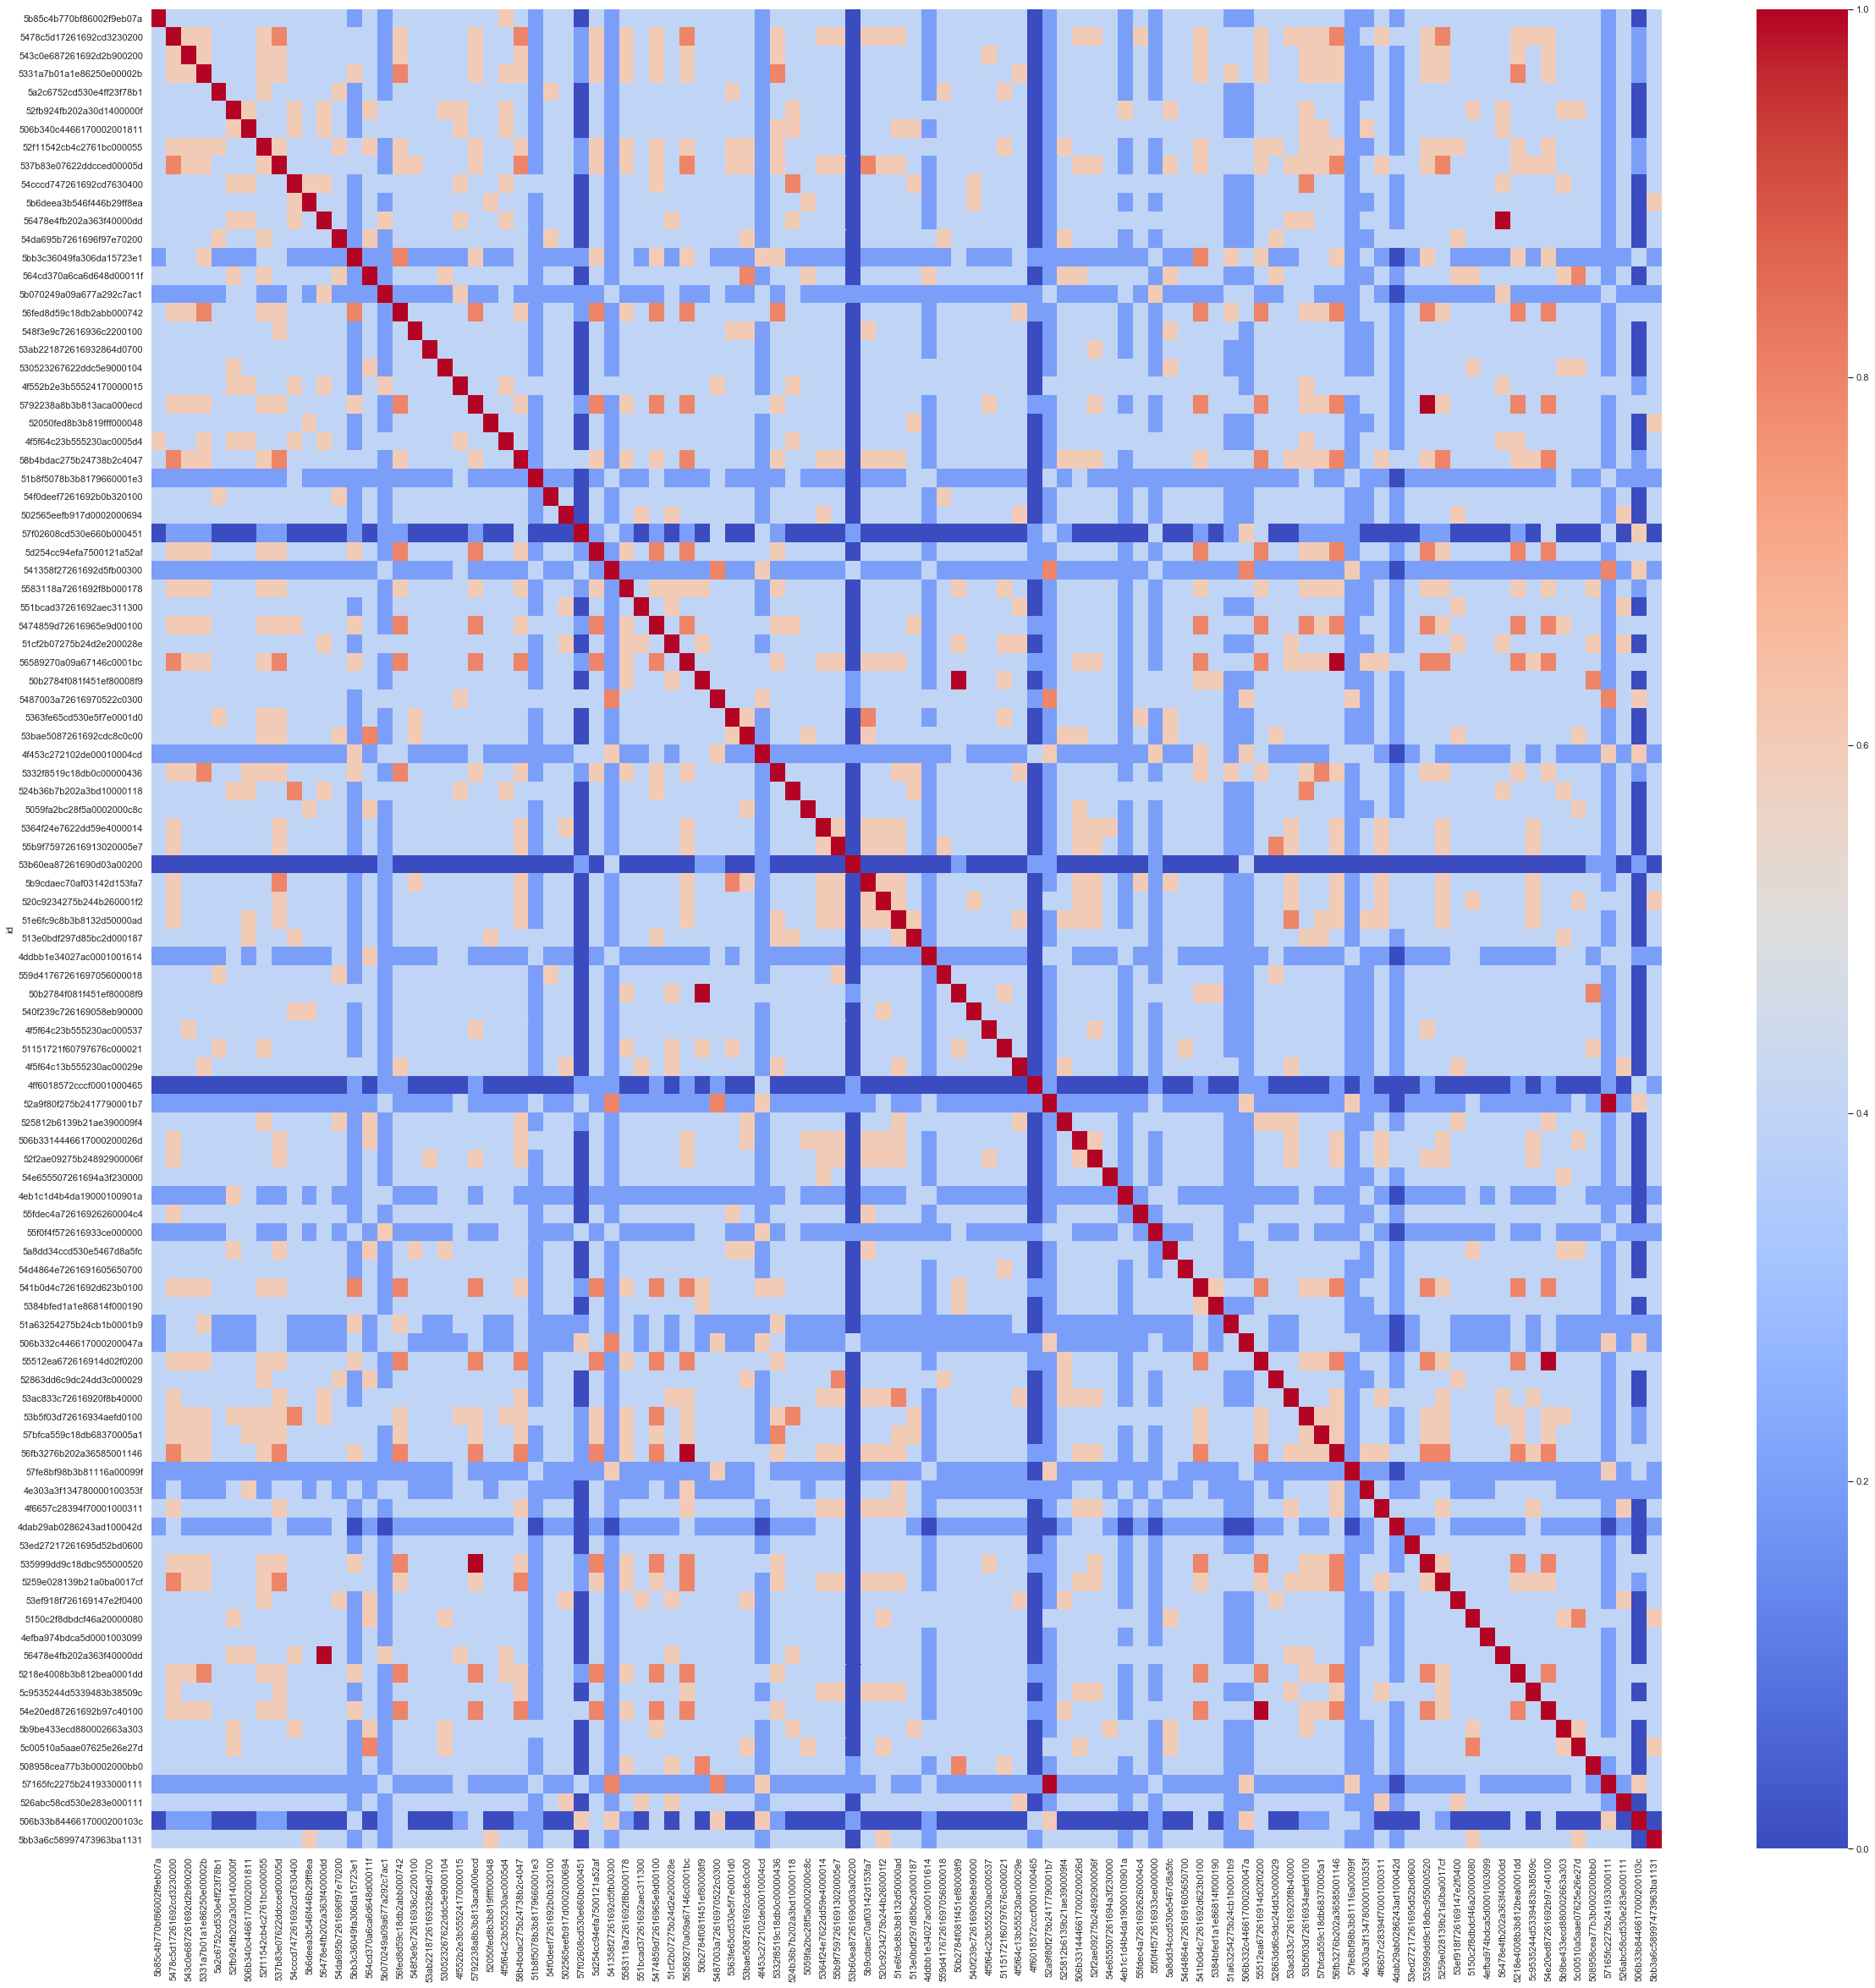

In [146]:
#using cosine similarity to see how similar artists are based on their genes
plt.figure(figsize=(40,40))

sns.set(font_scale=1)
sns.heatmap(plot_df, cmap ='coolwarm', linecolor='black', linewidths=.00000005)

plt.show()

### Similar Genes based on Gene sharing of artists

In [182]:
genecorr_df = pd.DataFrame()
genecorr_df['id'] = corr_data2['id'].values

In [183]:
analysis_df_genes = make_dummy_df(dummy_genes(corr_data2), genecorr_df)

In [184]:
def assign_dummies(og_df, new_df):
    for i in range(og_df.shape[0]):
        if type(og_df['gene_types'].loc[i]) != float:
            dirty_genes = og_df['gene_types'].loc[i]
            genes = dirty_genes.split(';')
            
            for col in new_df.columns:
                for gene in genes:
                    if col == gene:
                        new_df.loc[i, col]= 1
    return new_df

In [185]:
analysis_df_genes2 = assign_dummies(corr_data2, analysis_df_genes)

In [188]:
analysis_df_genes2 = analysis_df_genes2.set_index('id')

In [204]:
analysis_df_genes2 = analysis_df_genes2.transpose()

In [205]:
# Compute Cosine Similarity
cosine_sim2 = skl.metrics.pairwise.cosine_similarity(analysis_df_genes2, analysis_df_genes2)
cosine_sim2

array([[1.        , 0.91773288, 0.10259784, ..., 0.10259784, 0.10259784,
        0.10259784],
       [0.91773288, 1.        , 0.11043153, ..., 0.11043153, 0.11043153,
        0.11043153],
       [0.10259784, 0.11043153, 1.        , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.10259784, 0.11043153, 0.        , ..., 1.        , 1.        ,
        0.        ],
       [0.10259784, 0.11043153, 0.        , ..., 1.        , 1.        ,
        0.        ],
       [0.10259784, 0.11043153, 0.        , ..., 0.        , 0.        ,
        1.        ]])

In [206]:
gene_plot_df = pd.DataFrame(columns=list(analysis_df_genes2.index.values), data=cosine_sim2)

In [207]:
gene_plot_df['genes'] = analysis_df_genes2.index.values

In [208]:
gene_plot_df = gene_plot_df.set_index('genes')

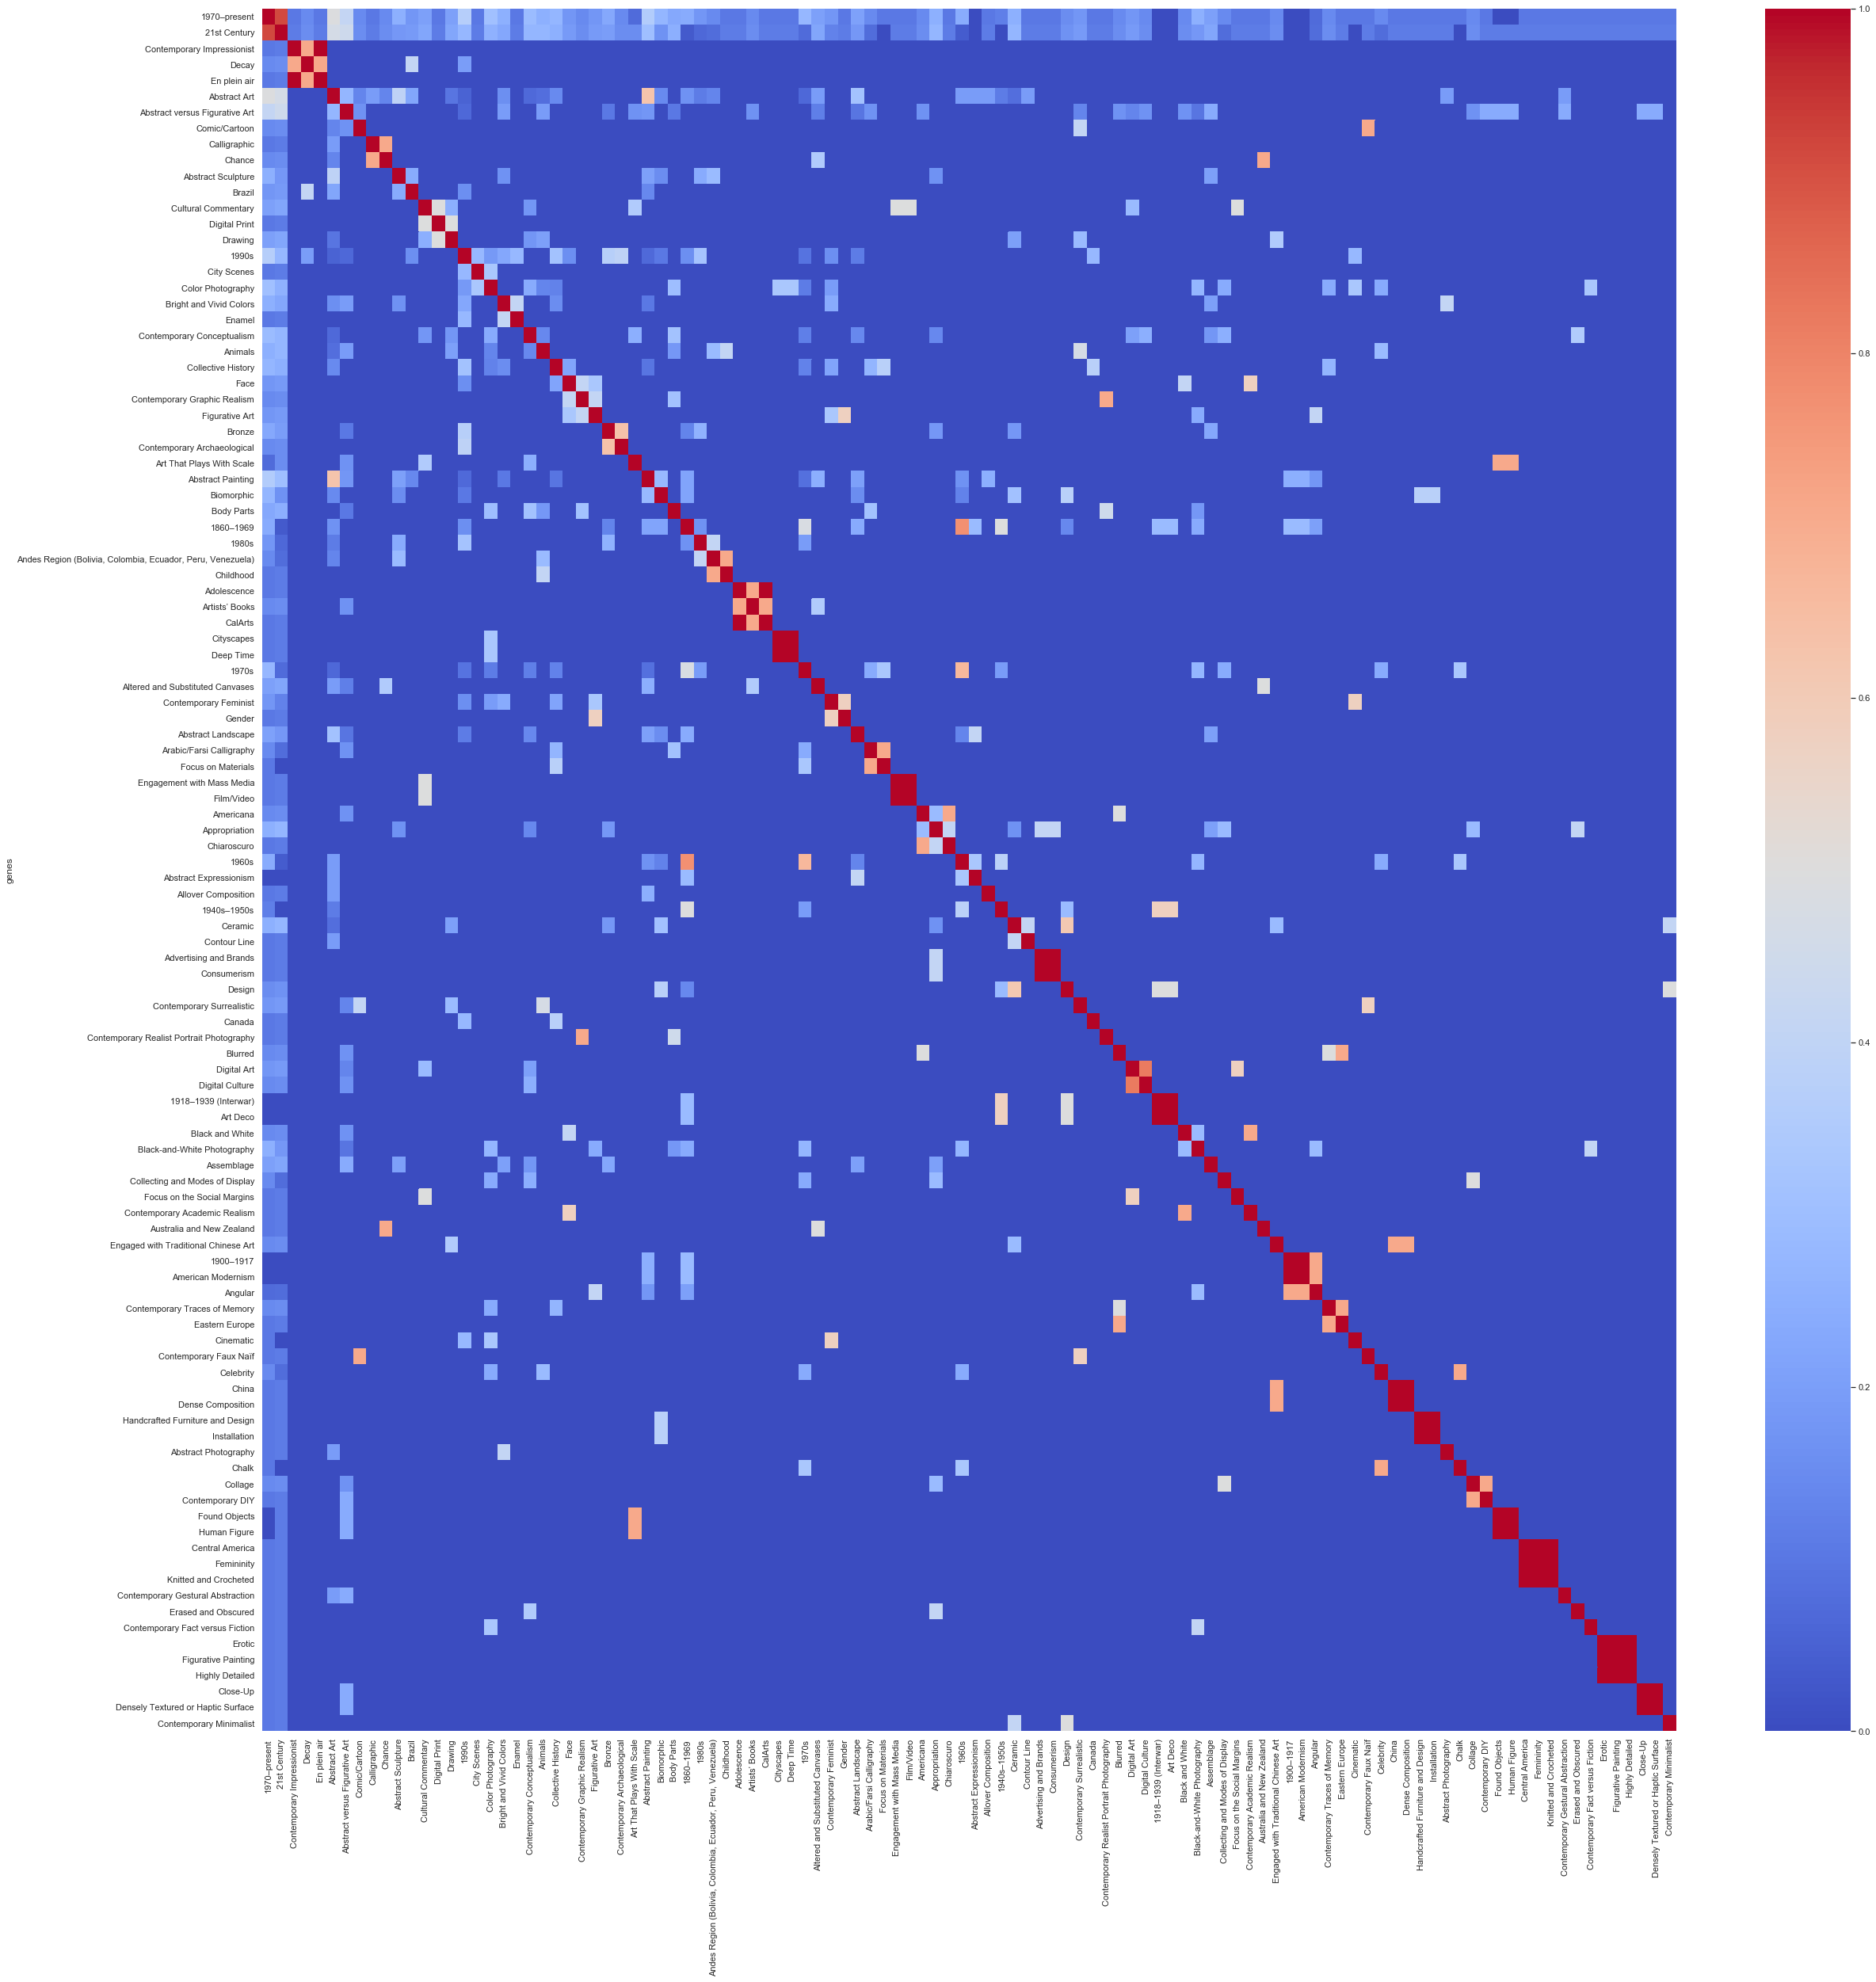

In [209]:
#using cosine similarity to see how simmilar genes are based on how often they are grouped together per artist
plt.figure(figsize=(40,40))

sns.set(font_scale=1)
sns.heatmap(gene_plot_df, cmap ='coolwarm', linecolor='black', linewidths=.00000005)

plt.show()

# Network Graph: Similarty between artists based on their shared genes
### Nodes: 100 randomly selected female artists
### Edges: represent at least 1 shared gene between artist A and artist B

In [211]:
import networkx as nx

/Applications/anaconda3/lib/python3.7/site-packages/networkx/drawing/nx_pylab.py:563: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if not cb.iterable(width):
/Applications/anaconda3/lib/python3.7/site-packages/networkx/drawing/nx_pylab.py:611: MatplotlibDeprecationWarning: 
The is_numlike function was deprecated in Matplotlib 3.0 and will be removed in 3.2. Use isinstance(..., numbers.Number) instead.
  if cb.is_numlike(alpha):


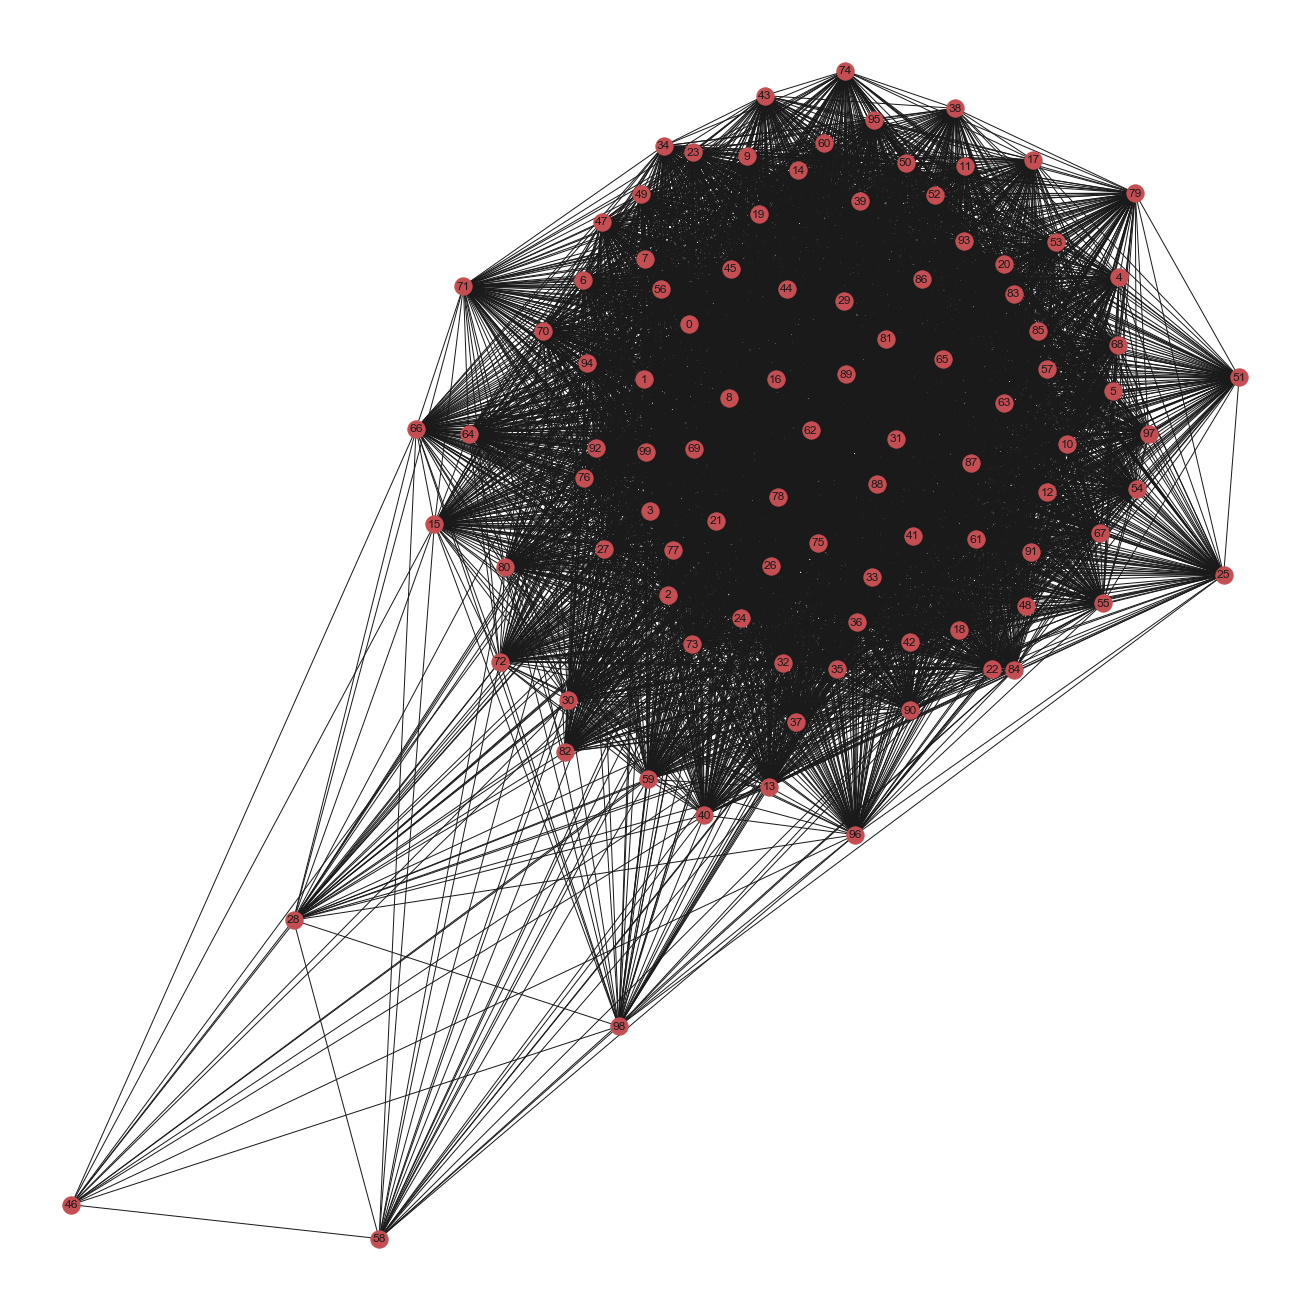

In [232]:
plt.figure(figsize=(18,18)) 
DistMatrix = cosine_sim
G = G=nx.from_numpy_matrix(DistMatrix)
nx.draw(G , with_labels=True)

plt.show()

The above graphs shows that the majority of the randomly selected female artists share the same art genes as attributes on their artist profiles. This is expected due to the small community of female artists in the art world and the theory of homophily. 

## Network Graph: Similarty between genes based on how often genes are listed together on an artist's profile
### Nodes: Genes
### Edges: represent  at least 1 artist that depicts both gene A and gene B

/Applications/anaconda3/lib/python3.7/site-packages/networkx/drawing/nx_pylab.py:563: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if not cb.iterable(width):
/Applications/anaconda3/lib/python3.7/site-packages/networkx/drawing/nx_pylab.py:611: MatplotlibDeprecationWarning: 
The is_numlike function was deprecated in Matplotlib 3.0 and will be removed in 3.2. Use isinstance(..., numbers.Number) instead.
  if cb.is_numlike(alpha):


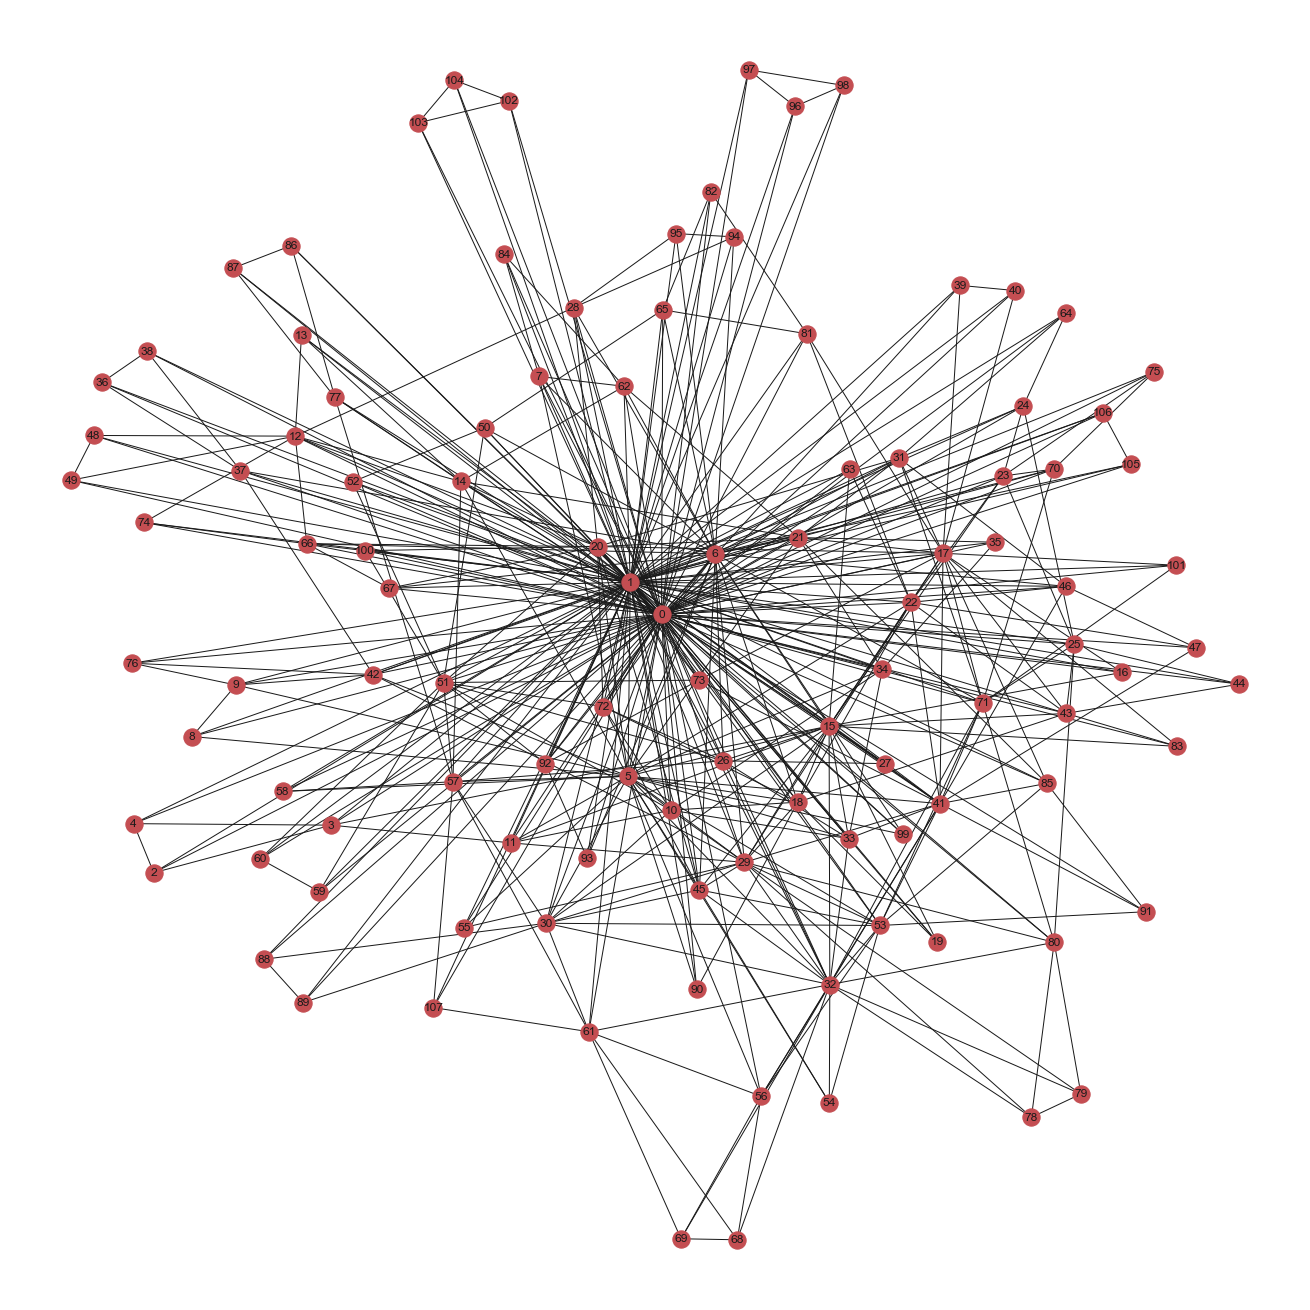

In [233]:
plt.figure(figsize=(18,18)) 
DistMatrix = cosine_sim2
G = G=nx.from_numpy_matrix(DistMatrix)
nx.draw(G , with_labels=True)

plt.show()

The above graph shows that while a minimal number of genes are often listed together on the randomly selected artists profiles, most genes are not listed together on an artist's profiles - specifically within the context of these 100 randomly selected female artists. However, we can see little clusters start to form - with about 3-4 distinct genes - that tell us certain genes are usually listed together/artistically practiced together. 